Nishan Karki<br>
BINF 3360<br>
Date: 02/03/2022<br>
Final Project (Data Analysis)

# Intoduction

Data mining is used in different domains for analysis of big data. With the advent of modern big data, 
datamining has present oneself as a tool to extract and identify concealed patterns and similar features 
within a give dataset. With the vast amount of data extracted in the field of bioinformatics, the techniques 
of datamining have become relevant to answer difficult and intensive bioinformatics questions. Data mining 
provides powerful support, feedback, and analysis of these huge data through the application of supervised 
and unsupervised machine learning techniques.  Techniques such as clustering, classification, association, 
pattern matching, and decision tree are prominently used within the field of bioinformatics. 

Clustering as a data mining technique follows concepts of unsupervised machine learning. 
This is specifically relevant to the field of bioinformatics as the field is majorly dominant towards 
exploratory data analysis. The core fundamentals of clustering lie in its ability of grouping or finding 
patterns within an unlabeled dataset using the different distance-based features analysis techniques. 
Clustering aims to maximize similarity between object of same class and minimize similarity between object 
of different classes.  Based on the different approach for finding similarities in a dataset, clustering 
can be majorly classified into five types: Hierarchy, Density, Partition, Grid and Model. 
In this tutorial, we are going to explore two different clustering algorithms: 
    K-Means (Partition) and DBSCAN (Density).


# Research Question

Seals dataset was provided by Dr. Sarah Kienle. The research question was generated based on the metadata
provided. The Land timeand water time were calculated based on the trips made by the seals on a given timeframe. Number of foraging trips was also calculated based on the data. From the provided data, we wanted to find out if the data had any predictive power. We plan to signify the predictive power of the selected features
(Landtime, Watertime and foraging trips) by analysing these features using clustering algorithms: K-means and
DBSCAN. This led us to our research question:

Based on the seals features (Landtime, Watertime and foraging trips) can we determine the SEX of these seals?

In [1]:
#Importing all required libraries
import os
import pandas as pd

In [8]:
# Assigning current working directory as path location
path = os.getcwd()
print(path)
# Attach location to the seal metadata file 
seal_data = path + "/forage_data.csv"
#Import .csv data to pandas dataframe
forage_data = pd.read_csv(seal_data,index_col=0)
print(forage_data)

/Users/nises/Desktop/CompBio_Final_NishanKarki
    DeployID Sex   Landtime   Watertime  ForagingTrips
0   173711.0   F  38.919294  116.395752           34.0
1   173712.0   F  81.355521  207.576632           63.0
2   173713.0   F  43.993403  135.569873           32.0
3   173714.0   F  72.512535  145.992454           36.0
4   173717.0   F  24.353796  132.193785           14.0
5   173718.0   F  42.821748   58.731331           25.0
6   173719.0   F  30.770382   86.256238           17.0
7   173721.0   F  21.380787  138.688160           14.0
8   180842.0   F   4.695995   23.253252            2.0
9   180843.0   F  68.850127  147.950081           78.0
10  180851.0   F  15.314248   54.446979           13.0
11  180852.0   F  21.708299   73.134664           20.0
12  180853.0   F  36.890498   70.788553           33.0
13  180854.0   F  86.186262  152.107535           41.0
14  180856.0   F  28.877141  172.690498           38.0
15  180857.0   F  21.464583   81.284398           20.0
16  173715.0   M  

# Features selection:
Feature selection is an important step for any machine learning algorithm. Select features that are relevant to the machine learning algorithm being implemented. <br>
Example:<br>
In our forage_data we will only feed column (features) Lamdtime, Watertime and ForagingTrips to our machine learning model.<br>
We disregard DeployID and Sex columns (features) as they are not relevant to our dataset and do not store information important for clutering.

In [9]:
features_data = forage_data.filter(['Landtime', 'Watertime', 'ForagingTrips'])
print(features_data)

     Landtime   Watertime  ForagingTrips
0   38.919294  116.395752           34.0
1   81.355521  207.576632           63.0
2   43.993403  135.569873           32.0
3   72.512535  145.992454           36.0
4   24.353796  132.193785           14.0
5   42.821748   58.731331           25.0
6   30.770382   86.256238           17.0
7   21.380787  138.688160           14.0
8    4.695995   23.253252            2.0
9   68.850127  147.950081           78.0
10  15.314248   54.446979           13.0
11  21.708299   73.134664           20.0
12  36.890498   70.788553           33.0
13  86.186262  152.107535           41.0
14  28.877141  172.690498           38.0
15  21.464583   81.284398           20.0
16  17.246725   28.878380           10.0
17  57.055579  126.239456           32.0
18  34.382326  146.026887           26.0
19   0.286181   18.861551            2.0


# Data Standardization
Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).<br>
Standardization of a dataset is a common requirement for many machine learning estimators as they might behave badly if the individual features do not more or less look like standard normally distributed data. <br>
StandardScaler:<br>
The standard score of a sample x is calculated as:<br>
z = (x - u) / s<br>
where,<br>
u is the mean of the training samples<br> 
and s is the standard deviation of the training samples<br>

Here we have a normally distributed data and we use standard scaler as our scaler.

In [11]:
#Sklearn library for data preprocessing
from sklearn import preprocessing
#Creating an object od the StandardScaler()
scaler = preprocessing.StandardScaler()
standarized_df = pd.DataFrame(scaler.fit_transform(features_data))
print(standarized_df)

           0         1         2
0   0.061433  0.203646  0.355106
1   1.839709  1.964965  1.939427
2   0.274062  0.574028  0.245843
3   1.469147  0.775358  0.464370
4  -0.548929  0.508813 -0.737529
5   0.224964 -0.910244 -0.136579
6  -0.280044 -0.378552 -0.573633
7  -0.673512  0.634263 -0.737529
8  -1.372683 -1.595566 -1.393110
9   1.315675  0.813173  2.758904
10 -0.927728 -0.993004 -0.792161
11 -0.659788 -0.632019 -0.409738
12 -0.023583 -0.677338  0.300475
13  2.042140  0.893482  0.737529
14 -0.359380  1.291078  0.573633
15 -0.670001 -0.474592 -0.409738
16 -0.846749 -1.486907 -0.956056
17  0.821428  0.393794  0.245843
18 -0.128687  0.776023 -0.081948
19 -1.557475 -1.680400 -1.393110


# Data Visualization (2D data)
Data visualization is an important concept for implementing machine learning algorithms. Visualizing data helps us solidify our understanding of the data and help establish and identify next steps for the process.

matplotlib is the most used library for data visualization in machinelearning. Other library like seaborn can also be used for visualization.

Below we plot all combination of our features in a scatter plots. It helps us identify and visualize datapoints and possible clusters. It will also help us choose an algorithm for the processing.

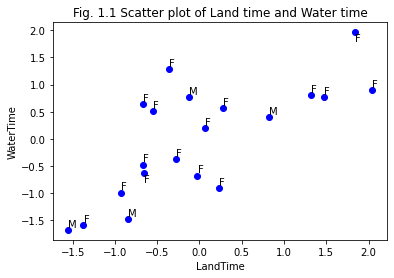

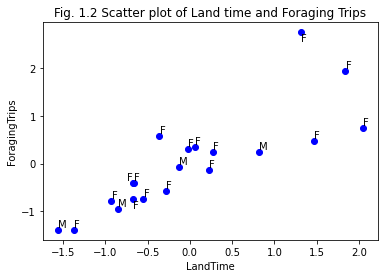

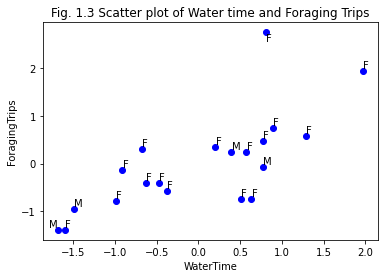

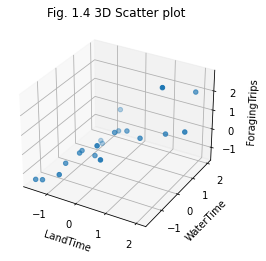

In [16]:
#adjustText is a helpful library that provide annotations for datapoints in our plot
import adjustText as ad
import matplotlib.pyplot as plt

#Assigning an array of the value of columns to be used to annotate data points. This can be changed as needed
id_array = forage_data['Sex'].tolist()

#Scatter plot for Land time and Water time
fig, ax = plt.subplots()
plt.scatter(standarized_df[0], standarized_df[1], color='blue')
pca1_scores = standarized_df[0]
pca2_scores = standarized_df[1]
texts = []
for i, txt in enumerate(id_array):
    texts.append(ax.text(pca1_scores[i], pca2_scores[i], id_array[i]))
ad.adjust_text(texts)
plt.xlabel('LandTime')
plt.ylabel('WaterTime')
plt.title('Fig. 1.1 Scatter plot of Land time and Water time')
plt.show()    

#Scatter plot for Land time and Foraging Trips
fig, ax = plt.subplots()
plt.scatter(standarized_df[0], standarized_df[2], color='blue')
pca1_scores = standarized_df[0]
pca2_scores = standarized_df[2]
texts = []
for i, txt in enumerate(id_array):
    texts.append(ax.text(pca1_scores[i], pca2_scores[i], id_array[i]))
ad.adjust_text(texts)
plt.xlabel('LandTime')
plt.ylabel('ForagingTrips')
plt.title('Fig. 1.2 Scatter plot of Land time and Foraging Trips')
plt.show()    

#Scatter plot for Water time and Foraging Trips
fig, ax = plt.subplots()
plt.scatter(standarized_df[1], standarized_df[2], color='blue')
pca1_scores = standarized_df[1]
pca2_scores = standarized_df[2]
texts = []
for i, txt in enumerate(id_array):
    texts.append(ax.text(pca1_scores[i], pca2_scores[i], id_array[i]))
ad.adjust_text(texts)
plt.xlabel('WaterTime')
plt.ylabel('ForagingTrips')
plt.title('Fig. 1.3 Scatter plot of Water time and Foraging Trips')
plt.show() 

#3D plot for our 3 features Landtime, Watertime and Foragingtrips
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(standarized_df[0], standarized_df[1], standarized_df[2])
ax.set_xlabel('LandTime')
ax.set_ylabel('WaterTime')
ax.set_zlabel('ForagingTrips')
plt.title('Fig. 1.4 3D Scatter plot')
plt.show()

# Dimension Reduction

High numbers of data features often make a predictive modeling task more challenging to model, more generally referred to as the curse of dimensionality. Dimensionality reduction techniques are often used for data visualization. Nevertheless these techniques can be used in applied machine learning to simplify a classification dataset in order to better fit a predictive model.<br>

Here we use PCA (Principal Component Analysis) to reduce the dimension of our dataset. We will reduce the dimension of our dataset from 3 to 2.

# PCA (Principal Component Analysis)

PCA is an unsupervised linear transformation technique that is widely used across different fields, most prominently for feature extraction and dimensionality reduction. PCA helps us to identify patterns in data based on the correlation between features. It aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.

Variance explained: 94.46%
[[ 0.35817865  0.0073312 ]
 [ 3.31415596  0.13759438]
 [ 0.62560376  0.27035018]
 [ 1.56669268 -0.13111308]
 [-0.47022906  0.92821112]
 [-0.4568875  -0.79344757]
 [-0.71225922  0.02031187]
 [-0.47314712  1.08273206]
 [-2.51346375 -0.23076297]
 [ 2.84444021 -0.92051469]
 [-1.56337293 -0.14265549]
 [-0.98023494 -0.09904977]
 [-0.21592715 -0.66776074]
 [ 2.12878749 -0.37048646]
 [ 0.84738221  0.99555143]
 [-0.89826271  0.03563745]
 [-1.88805204 -0.52198178]
 [ 0.84567786 -0.10094061]
 [ 0.31007336  0.72721582]
 [-2.66915579 -0.22622236]]


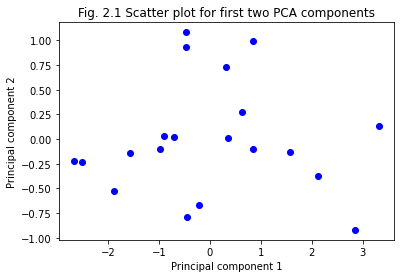

In [20]:
#import libraries for PCA
from sklearn.decomposition import PCA
import numpy as np

#Setting PCA components to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(standarized_df)
print('Variance explained: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))
print(pca_result)

#Plotting PCA output
PCA_components = pd.DataFrame(pca_result)
plt.scatter(PCA_components[0], PCA_components[1], color='blue')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title("Fig. 2.1 Scatter plot for first two PCA components")
plt.show()

# Clustering Algorithms

# K-Means

Pseudocode for K-means algorithm: 
1.	Decide the number of clusters. This number is called K and number of clusters is equal to the number of centroids. Based on the value of K, generate the coordinates for K random centroids.
2.	For every point, calculate the Euclidean distance between the point and each of the centroids.
3.	Assign the point to its nearest centroid. The points assigned to the same centroid form a cluster.
4.	Once clusters are formed, calculate new centroid for each cluster by taking the cluster mean. Cluster mean is the mean of the x and y coordinates of all the points belonging to the cluster.
5.	Repeat step 2, 3 and 4 until the centroids cannot move any further. In other words, repeat these steps until convergence.

# Choosing number of centrois for K-Means

Elbow method and Silhouette method were used to estimate the number of centroid for our clustering. Figure 3.1
and figure 3.2 shows the plot for our estimates for the number of centroids. Both figures interprets the number of cluster to be between 2 and 4. This interpretation is based on the line plot being linear after certain point.
A linear point is visible at 2 and 4 in the line plot.

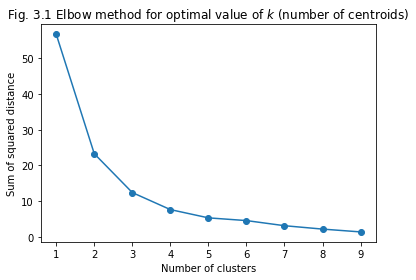

Optimized at 8 clusters


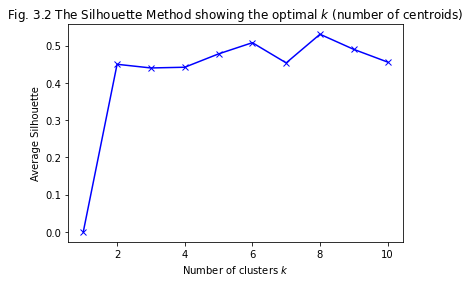

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k)
    km.fit(pca_result)
    sse.append(km.inertia_)
plt.plot(range(1, 10), sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.title("Fig. 3.1 Elbow method for optimal value of $k$ (number of centroids)")
plt.show()

scores = [0]
for i in range(2, 11):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(pca_result)
    score = silhouette_score(pca_result, fitx.labels_)
    scores.append(score)
print("Optimized at", max(range(len(scores)), key=scores.__getitem__) + 1, "clusters")
plt.plot(range(1, 11), np.array(scores), 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('Fig. 3.2 The Silhouette Method showing the optimal $k$ (number of centroids)')
plt.show()

#  K-Means Implementation

[0 1 0 1 0 0 0 0 2 1 2 0 0 1 0 0 2 0 0 2]


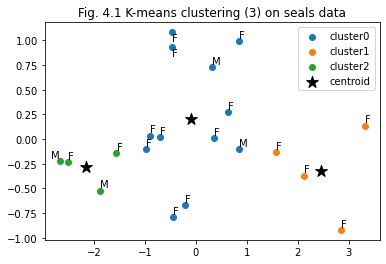

In [29]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(pca_result)
centroids = kmeans.cluster_centers_
print(label)
fig, ax = plt.subplots()
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(pca_result[label == i, 0], pca_result[label == i, 1], label='cluster' + str(i))
plt.scatter(centroids[:, 0], centroids[:, 1], s=150, color='k', marker='*', label='centroid')

pca1_scores = pca_result[:, 0]
pca2_scores = pca_result[:, 1]
texts = []
for i, txt in enumerate(id_array):
    texts.append(ax.text(pca1_scores[i], pca2_scores[i], id_array[i]))
ad.adjust_text(texts)
plt.title("Fig. 4.1 K-means clustering (3) on seals data")
plt.legend()
plt.show()  

# Results K-Means

The results from the K-means algorithm were not conclusive. From the figure 4.1 we can see that no clear
clusters were obtained through the algorithm. This is primarily due to the low number of male seals in the dataset. Improvement on the clusters can be done by adding more features to the current dataset but a huge improvement is not expected due to low number of male seals in the provided dataset.

# DBSCAN

eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.<br>
minPts : The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.
1. Decide the value of eps and minPts.
2. For each point:
	Calculate its distance from all other points. If the distance is less than or equal to eps then mark 	that point as a 	neighbor of x.
	If the point gets a neighboring count greater than or equal to minPts, then mark it as a core point or visited.
3. For each core point, if it not already assigned to a cluster than create a new cluster. Recursively find all its neighboring points and assign them the same cluster as the core point.
4. Continue these steps until all the unvisited points are covered.


# Choosing a value for esp

Knee method was used to estimate the value of esp for our clustering. Figure 5.1shows the plot for our 
estimates for the value of esp. From the figure we can conclude the cvalue of esp to be between 0.6 and 0.7.
This is verified by the sharp inclination on the line plot in the figure 5.1.

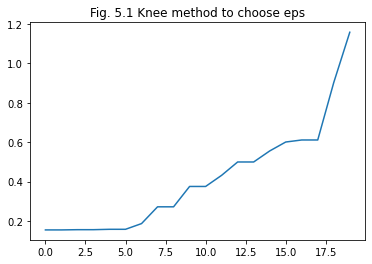

In [37]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=3)
nearest_neighbors.fit(pca_result)
distances, indices = nearest_neighbors.kneighbors(pca_result)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.title("Fig. 5.1 Knee method to choose eps")
plt.show()

# DBSCAN Implementation

[ 0 -1  0 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  0  0 -1]
eps: 0.6
min_samples: 3
Number of clusters: 2
Number of noise points: 11


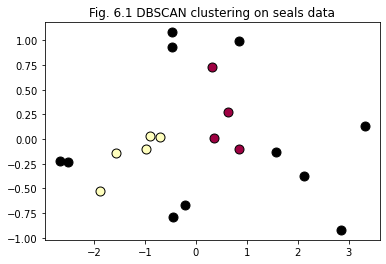

In [38]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

eps = 0.6
min_samples = 3

dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(pca_result)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
print(labels)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("eps: "+ str(eps))
print("min_samples: %d" % min_samples)

print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    xy = pca_result[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0],xy[:, 1],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=9,)
    xy = pca_result[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1],"o",markerfacecolor=tuple(col),markeredgecolor="k",markersize=9,)

plt.title("Fig. 6.1 DBSCAN clustering on seals data")
plt.show()

# Results DBSCAN

The results of DBSCAN is shown in figure 6.1. The black points reference the outliers while the other same
color points represent the density based clusters.
We can see from the clusters generated that output are not as
desired. Our initial assumption of being able to classify the gender of seals based on their features was not met.
This was primarily due to the low number of male seals in the dataset.

# Conclusion

The seals features data we defined did not have the predictive power to classify the seals gender. Both K-means
and DBSCAN displayed similar results for our given dataset due to the normal distribution of datapoints. Addition
of more features might be relevant but with out equal representation male and female seals in our dataset our
clusters are unlikely to be relevant to the research question.

# References

Sklearn.cluster.kmeans. scikit. (n.d.). Retrieved May 9, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 

Sklearn.cluster.DBSCAN. scikit. (n.d.). Retrieved May 9, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html 

# END